# Energy Indicators Analysis

### Reading the data
The energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, is read and stored into a DataFrame with the variable name of **energy**.

This is an Excel file, and not a comma separated values file. Also, The footer and header information from the datafile are excluded. The first two columns are unneccessary, I get rid of them, and I change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

I convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") are reflected as `np.NaN` values.

I rename the following list of countries:

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. I remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` is replaced by `'Bolivia'`, 

`'Switzerland17'` is `'Switzerland'`.

<br>

Next, I load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

I skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, I load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. this DataFrame is called **ScimEn**.

I join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). I use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame is the name of the country, and the columns are ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

In [2]:
import pandas as pd
import numpy as np
import os
energy_file = os.path.join("Resources", 'Energy Indicators.xls')
scimagojr_file = os.path.join("Resources", 'scimagojr-3.xlsx')
gdp_file = os.path.join("Resources", 'world_bank.csv')
xlsx = pd.ExcelFile(energy_file)
total_rows = xlsx.book.sheet_by_index(0).nrows
skiprows = 17
nrows = 244 - 17
skip_footer = total_rows - nrows - skiprows - 1
energy = xlsx.parse(0, skiprows=skiprows, skip_footer=skip_footer, usecols=[1,3,4,5]).rename(columns={'Unnamed: 1':'Country', 'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'})
energy=energy.replace('...', np.nan)
energy=energy.replace({'Country':{"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom","China, Hong Kong Special Administrative Region": "Hong Kong"}})
energy['Country'] = energy['Country'].replace(['\s*\d+', '\s*\(.*\)'], '', regex=True)
energy['Energy Supply']=energy['Energy Supply']*1000000
GDP = pd.read_csv(gdp_file,skiprows=4).rename(columns={'Country Name':'Country'})
GDP=GDP.replace({'Country':{"Korea, Rep.": "South Korea","Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}})
ScimEn=pd.read_excel(scimagojr_file)
columns_to_keep = ['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
GDP = GDP[columns_to_keep]
Merged=pd.merge(pd.merge(energy, GDP, how='inner', left_on='Country', right_on='Country'),ScimEn, how='inner', left_on='Country', right_on='Country').set_index('Country')
Merged.head()


,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.210000e+08,10.0,78.669280,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10,163,3,3,0,0,0.00,0
Albania,1.020000e+08,35.0,100.000000,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10,118,23,23,168,14,7.30,6
Algeria,1.959000e+09,51.0,0.551010,1.446474e+11,1.495654e+11,1.531550e+11,1.556055e+11,1.612073e+11,1.658823e+11,1.715223e+11,1.763249e+11,1.830252e+11,1.901632e+11,42,1215,1197,7393,1413,6.08,40
American Samoa,NaN,NaN,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,1,1,0,0,0.00,0
Andorra,9.000000e+06,121.0,88.695650,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN,168,2,2,13,0,6.50,1


### Question
What are the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

In [3]:
top15 = Merged.nsmallest(15,'Rank')
def top_15(df):
    result = df
    result = result.reset_index()
    result = result.set_index("Rank")
    return result[["Country"]]
top_15(top15)

,Country
Rank,
1,China
2,United States
3,Japan
4,United Kingdom
5,Russian Federation
6,Canada
7,Germany
8,India
9,France


### Question
When the datasets were joined using the intersection of the Countries, how many entries were lost?

In [4]:
def lost_entries():
    Merged1=pd.merge(pd.merge(energy, GDP, how='outer', left_on='Country', right_on='Country'),ScimEn, how='outer', left_on='Country', right_on='Country').set_index('Country')
    return len(Merged1)-len(Merged)

lost_entries()

156

## Working with the top 15 Countries

### Question
What is the average GDP over the last 10 years for each country? (excluding missing values from this calculation.)


In [5]:
import numpy as np

def avg_gdp(df):
    my_data = df
    rows  = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    my_data['avgGDP']=my_data.apply(lambda x: np.mean(x[rows].dropna()), axis=1)
    return my_data['avgGDP'].sort_values(axis=0, ascending=False)

avg_gdp(top15)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

In [6]:
def gdp_change_6th(df):
    my_data = df
    rows  = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    my_data['avgGDP']=my_data.apply(lambda x: np.average(x[rows].dropna()), axis=1)
    my_data['DeltaGDP']=my_data.apply(lambda x: x['2015']-x['2006'], axis=1)
    my_data=my_data.sort_values(by=['avgGDP'],ascending=False)
    return my_data.reset_index().loc[5][["Country",'DeltaGDP']]

gdp_change_6th(top15)

Country     United Kingdom
DeltaGDP       2.46703e+11
Name: 5, dtype: object

### Question
What is the mean `Energy Supply per Capita`?


In [7]:
def Avg_energy(df):
    return df['Energy Supply per Capita'].mean()

Avg_energy(top15)

157.59999999999999

### Question
What country has the maximum % Renewable and what is the percentage?

In [8]:
def max_renew(df):
    my_data = df
    max_percent=my_data['% Renewable'].max()
    max_country = my_data[my_data['% Renewable'] == max_percent]
    return (max_country.index[0],max_percent)

max_renew(top15)

('Brazil', 69.648030000000006)

### Question
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?


In [9]:
def top_citation_ratio():
    global top15
    top15['Ratio']=top15['Self-citations']/top15['Citations']
    Topratio=top15['Ratio'].max()
    top_country = top15[top15['Ratio'] == Topratio]
    return (top_country.index[0],Topratio)

top_citation_ratio()

('China', 0.68931261793894216)

### Question

Estimate the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?


In [10]:
def top_pop():
    global top15
    top15['PopEst']=top15['Energy Supply']/top15['Energy Supply per Capita']
    my_data = top15.sort_values(by=['PopEst'], ascending=False)
    my_data=my_data.reset_index()
    return my_data.loc[2]['Country']

top_pop()

'United States'

### Question
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?


In [11]:
def corr_cite_energ():
    global top15
    top15['Citable docs per capita']=top15['Citable documents']/top15['PopEst']
    return top15['Citable docs per capita'].corr(top15['Energy Supply per Capita'], method='pearson')

corr_cite_energ()

0.79400104354429457

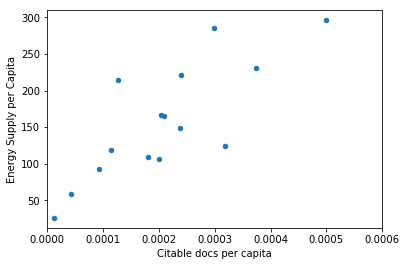

In [12]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    top15.plot(x='Citable docs per capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
plot9()

### Classifying
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.


In [13]:
def renew_class():
    global top15
    top15['HighRenew']=top15.apply(lambda x: 0 if x['% Renewable']<np.median(top15['% Renewable']) else 1, axis=1 )
    return top15['HighRenew']

renew_class()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Summary per continent
Group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.


In [14]:
def continent_group():
    global top15
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    top15 = top15.reset_index()
    top15["Continent"] = top15.apply(lambda x: ContinentDict[x["Country"]], axis =1)
    my_data = top15.groupby("Continent")
    continent_data = pd.DataFrame(my_data["Country"].count())
    continent_data["Population"] = my_data["PopEst"].sum()
    continent_data["Average Population/Country"] = my_data["PopEst"].mean()
    continent_data["Standard deviation"] = my_data["PopEst"].std()
    top15 = top15.set_index("Country")
    return  continent_data

continent_group()

,Country,Population,Average Population/Country,Standard deviation
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question
I cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

In [15]:
def continent_renew():
    global top15
    top15['Bin%Renew']=pd.cut(top15['% Renewable'],5)
    my_data = top15.reset_index()
    result = pd.DataFrame(my_data.groupby(["Continent", 'Bin%Renew'])["Country"].count())
    return result

continent_renew()

Country
Continent     Bin%Renew                
Asia          (2.212, 15.753]         4
              (15.753, 29.227]        1
Australia     (2.212, 15.753]         1
Europe        (2.212, 15.753]         1
              (15.753, 29.227]        3
              (29.227, 42.701]        2
North America (2.212, 15.753]         1
              (56.174, 69.648]        1
South America (56.174, 69.648]        1


Convert the Population Estimate series to a string with thousands separator (using commas)


In [16]:
def pop_convert():
    global top15
    top15['Convert PopEst']=top15['PopEst'].map('{:,.2f}'.format)
    return top15['Convert PopEst']

pop_convert()

Country
China                 1,367,645,161.29
United States           317,615,384.62
Japan                   127,409,395.97
United Kingdom           63,870,967.74
Russian Federation      143,500,000.00
Canada                   35,239,864.86
Germany                  80,369,696.97
India                 1,276,730,769.23
France                   63,837,349.40
South Korea              49,805,429.86
Italy                    59,908,256.88
Spain                    46,443,396.23
Iran                     77,075,630.25
Australia                23,316,017.32
Brazil                  205,915,254.24
Name: Convert PopEst, dtype: object

### Visualization

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


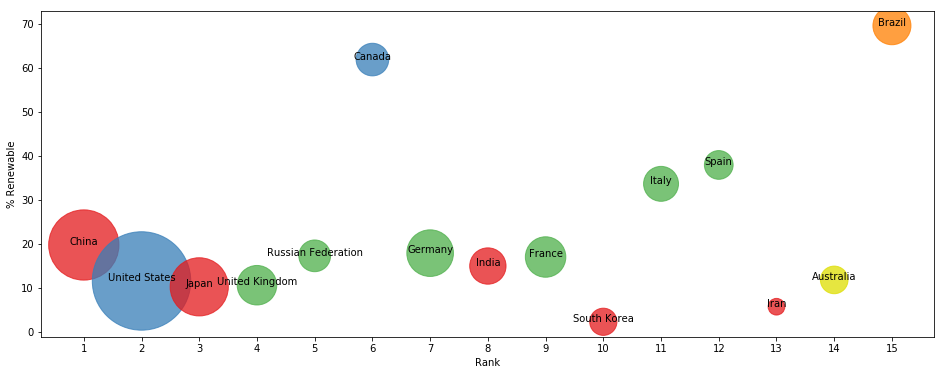

In [17]:
def plot_visual():
    import matplotlib as plt
    %matplotlib inline
    global top15
    ax = top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(top15.index):
        ax.annotate(txt, [top15['Rank'][i], top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_visual()

In [18]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!